### Name : Ridopandi Sinaga
### Title : Mobile Price Classification
### Laggle dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
### Problem: Classification

## --------------------------------------------------------------------------------------------------------------------------------------

## Import library yang diperlukan

In [1]:
import pandas as pd
import os, zipfile, shutil, PIL
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import matplotlib.patches as mpatches

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import scipy.stats as stats

## Dataset

In [2]:
!pip install -q kaggle

In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!chmod 600 /content/kaggle.json

In [5]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 97.7MB/s]


In [6]:
local_zip = '/content/mobile-price-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
# Import
data = pd.read_csv('/content/train.csv')

In [8]:
# Cek dataset
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
# Cek keterangan dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data Anaylsis

In [11]:
cs1 = ['#b788ca', '#9771b6', '#7e659f', '#582e67']
labelharga = ["Murah","Menengah Murah","Menegah Mahal","Mahal"]

### Plot Data Price Range

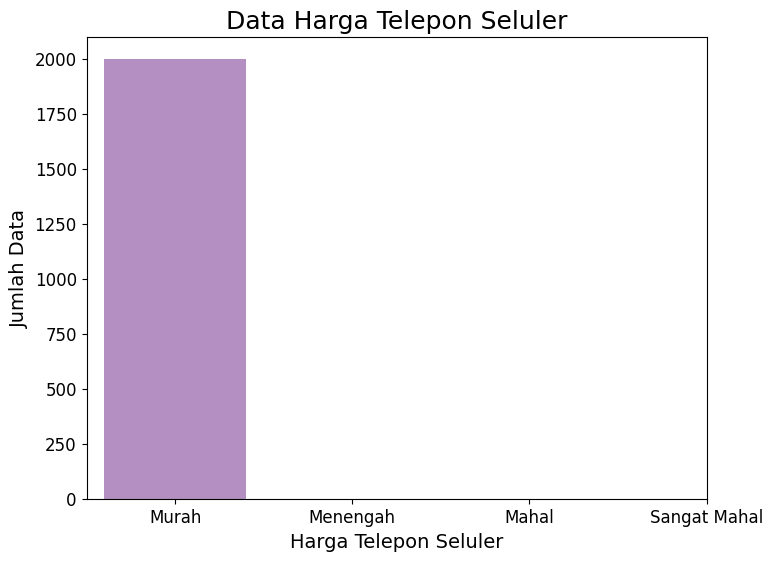

In [12]:
plt.figure(figsize=(8,6))
price = sns.countplot(data.price_range, palette=cs1)
plt.title('Data Harga Telepon Seluler', fontsize=18)
plt.ylabel('Jumlah Data', fontsize=14)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot RAM vs Price Range

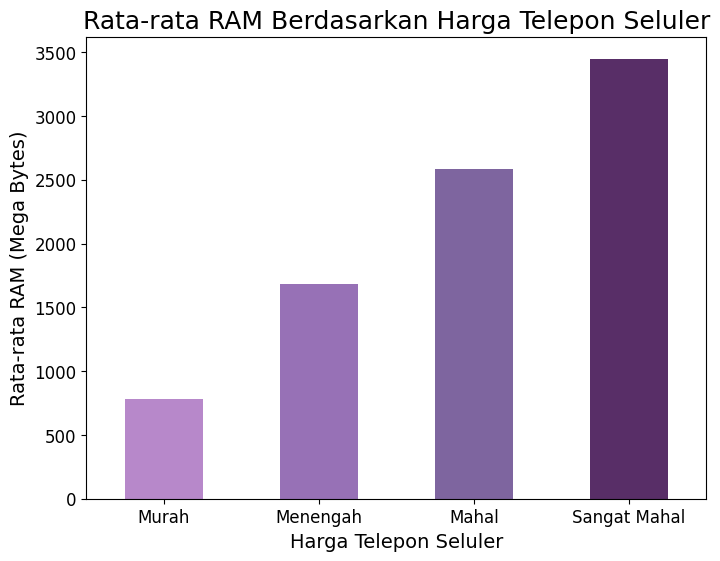

In [13]:
plt.figure(figsize=(8,6))

data.groupby(['price_range'])['ram'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata RAM Berdasarkan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata RAM (Mega Bytes)', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

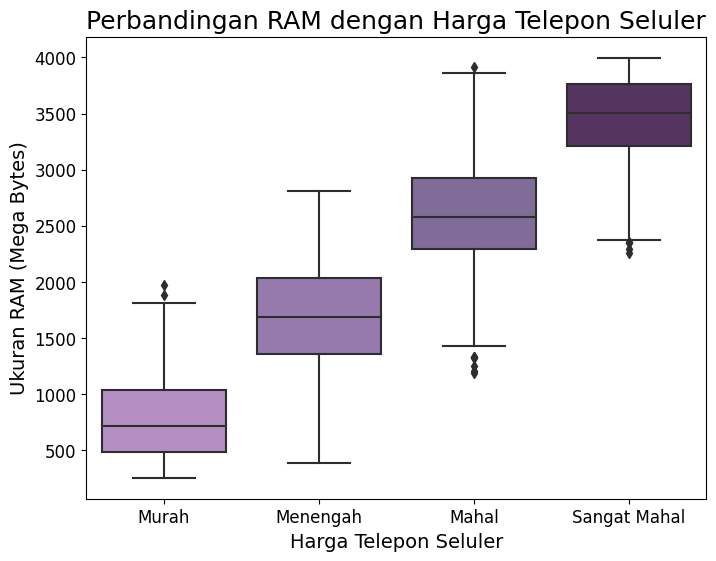

In [14]:
plt.figure(figsize=(8,6))

snsplot1 = sns.boxplot(x="price_range", y="ram", data=data, palette=cs1)
plt.title('Perbandingan RAM dengan Harga Telepon Seluler', fontsize=18)
plt.ylabel('Ukuran RAM (Mega Bytes)', fontsize=14)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot Battery Power vs Price Range

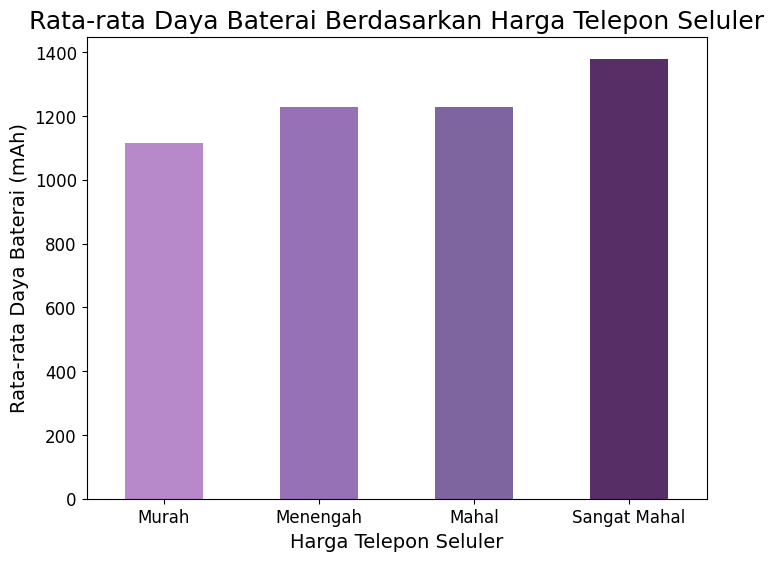

In [15]:
plt.figure(figsize=(8,6))

data.groupby(['price_range'])['battery_power'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Daya Baterai Berdasarkan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata Daya Baterai (mAh)', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

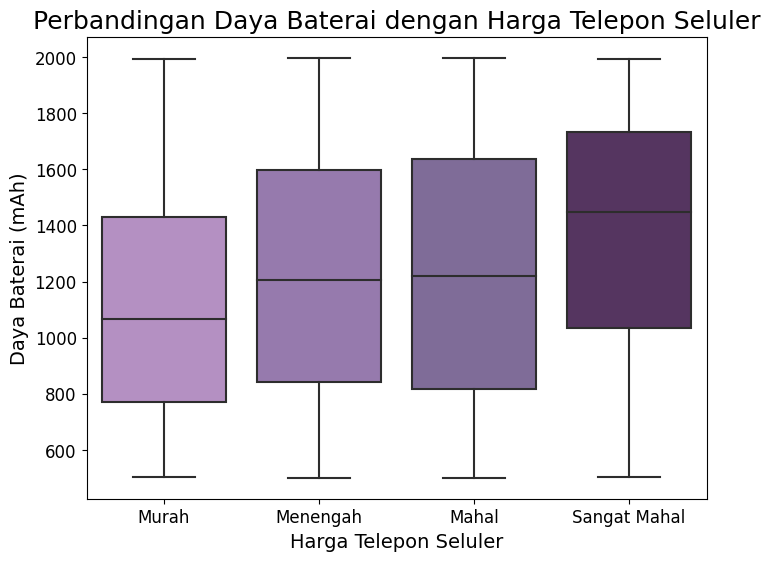

In [16]:
plt.figure(figsize=(8,6))

snsplot2 = sns.boxplot(x="price_range", y="battery_power", data=data, palette=cs1)
plt.title('Perbandingan Daya Baterai dengan Harga Telepon Seluler', fontsize=18)
plt.ylabel('Daya Baterai (mAh)', fontsize=14)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot Screen Size vs Price Range

<ipython-input-17-919978190813>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['price_range'])['px_width','px_height'].mean().plot(kind = 'bar', color = cs1, rot = 0)


<Figure size 800x600 with 0 Axes>

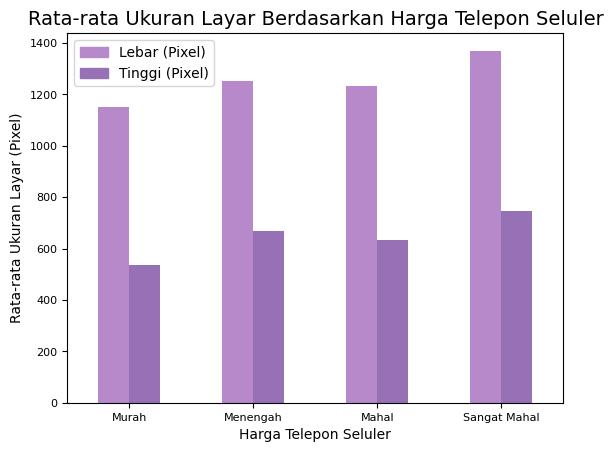

In [17]:
plt.figure(figsize=(8,6))
lbl1 = mpatches.Patch(color='#b788ca', label='Lebar (Pixel)')
lbl2 = mpatches.Patch(color='#9771b6', label='Tinggi (Pixel)')

data.groupby(['price_range'])['px_width','px_height'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Ukuran Layar Berdasarkan Harga Telepon Seluler', fontsize=14)
plt.xlabel('Harga Telepon Seluler', fontsize=10)
plt.ylabel('Rata-rata Ukuran Layar (Pixel)', fontsize=10)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=8)
plt.yticks(fontsize=8)

plt.legend(handles = [lbl1,lbl2], loc = 'upper left')

plt.show()

### Plot Data 3G

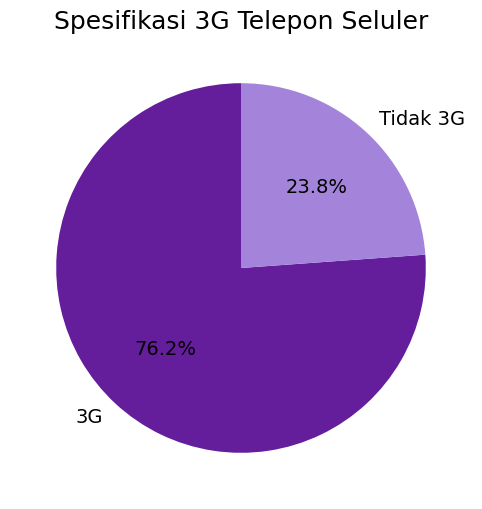

In [18]:
plt.figure(figsize=(8,6))

labels = ["3G",'Tidak 3G']
values = data['three_g'].value_counts().values
cs2 = ['#641d9b','#a384da']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=cs2, textprops={'fontsize': 14})
plt.title('Spesifikasi 3G Telepon Seluler', fontsize=18)

plt.show()

In [19]:
data_3G_1 = data[(data.three_g == 1)]
data_3G_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [20]:
data_3G_0 = data[(data.three_g == 0)]
data_3G_0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902,1064,2337,11,1,18,0,1,1,1
22,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
30,1579,1,0.5,1,0,0,5,0.2,88,7,...,1358,1739,3532,17,11,12,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610,1437,2313,14,1,11,0,1,0,2
1983,1262,0,1.8,1,12,0,34,0.1,149,5,...,223,737,3248,13,3,4,0,1,1,2
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1


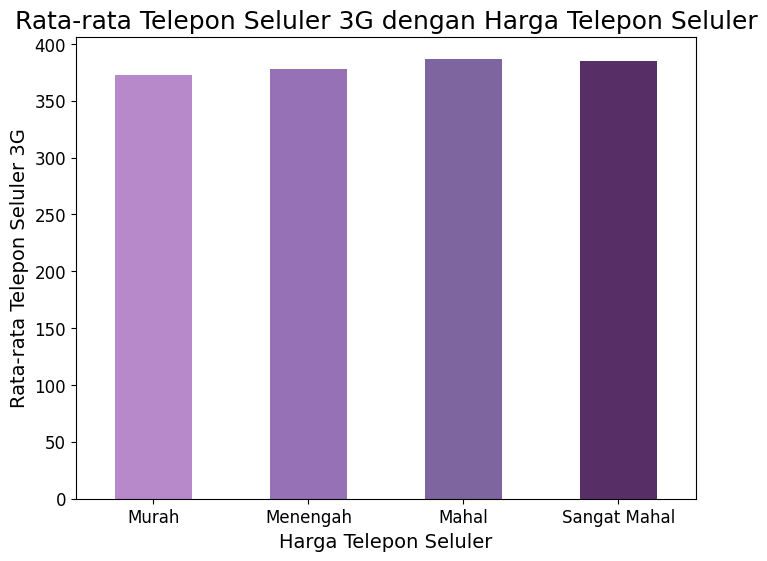

In [21]:
plt.figure(figsize=(8,6))

data_3G_1.groupby(['price_range'])['three_g'].value_counts().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Telepon Seluler 3G dengan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata Telepon Seluler 3G', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

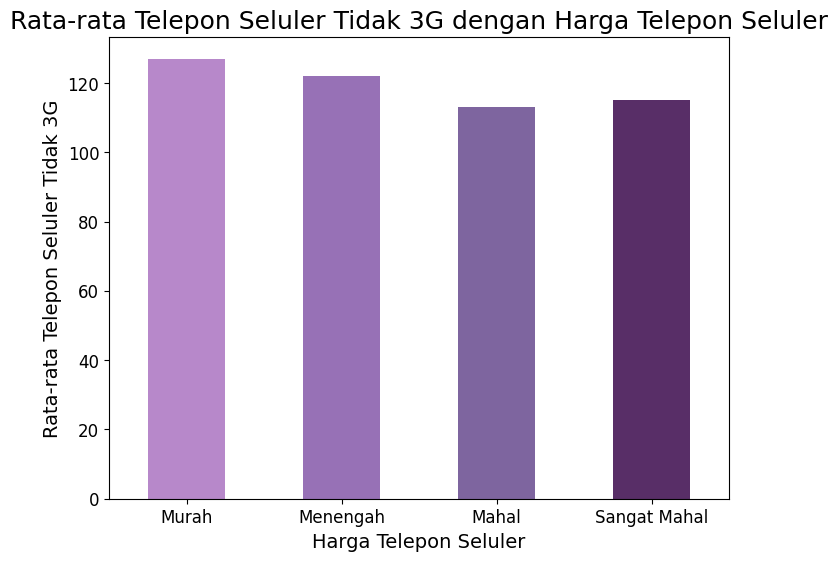

In [22]:
plt.figure(figsize=(8,6))

data_3G_0.groupby(['price_range'])['three_g'].value_counts().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Telepon Seluler Tidak 3G dengan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata Telepon Seluler Tidak 3G', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot Data 4G

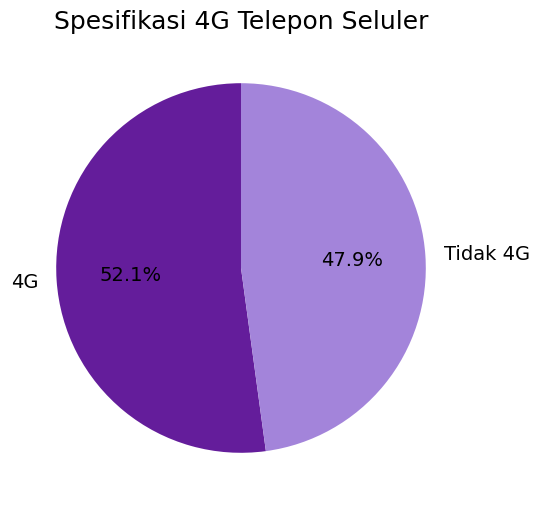

In [23]:
plt.figure(figsize=(8,6))

labels = ["4G",'Tidak 4G']
values = data['four_g'].value_counts().values
cs2 = ['#641d9b','#a384da']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=cs2, textprops={'fontsize': 14})
plt.title('Spesifikasi 4G Telepon Seluler', fontsize=18)

plt.show()

In [24]:
data_4G_1 = data[(data.four_g == 1)]
data_4G_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [25]:
data_4G_0 = data[(data.four_g == 0)]
data_4G_0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,586,0,2.8,0,2,0,15,0.2,83,3,...,241,854,2592,12,8,3,0,0,0,1
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3


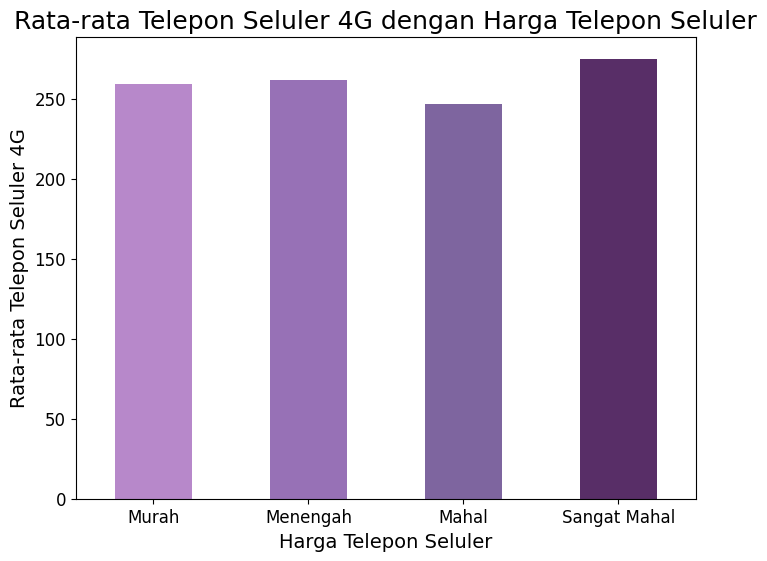

In [26]:
plt.figure(figsize=(8,6))

data_4G_1.groupby(['price_range'])['four_g'].value_counts().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Telepon Seluler 4G dengan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata Telepon Seluler 4G', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

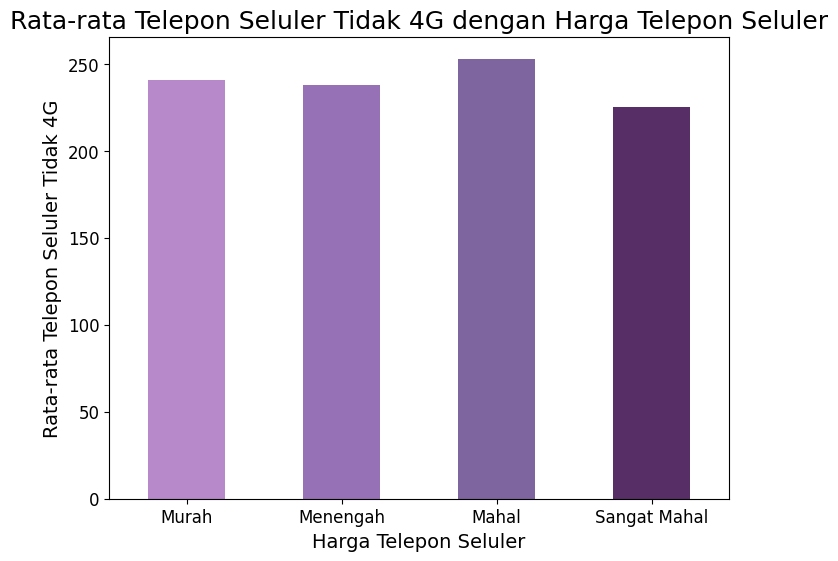

In [27]:
plt.figure(figsize=(8,6))

data_4G_0.groupby(['price_range'])['four_g'].value_counts().plot(kind = 'bar', color = cs1, rot = 0)
plt.title('Rata-rata Telepon Seluler Tidak 4G dengan Harga Telepon Seluler', fontsize=18)
plt.xlabel('Harga Telepon Seluler', fontsize=14)
plt.ylabel('Rata-rata Telepon Seluler Tidak 4G', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

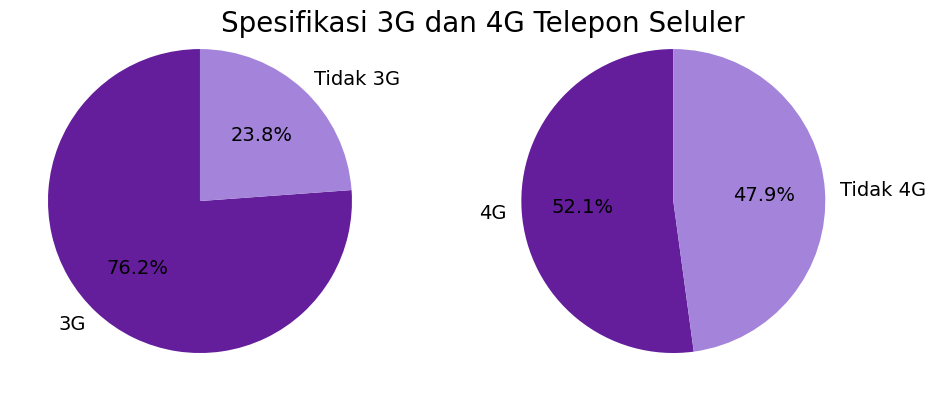

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(6)
fig.tight_layout()
#fig.suptitle('Horizontally stacked subplots')

#cs1 = ['#b788ca', '#9771b6', '#7e659f', '#582e67']
cs1_3G = ['#b788ca', '#9771b6']
cs1_4G = ['#7e659f', '#582e67']
cs2 = ['#641d9b','#a384da']

label_3G = ["3G",'Tidak 3G']
value_3G = data['three_g'].value_counts().values
ax1.pie(value_3G, labels=label_3G, autopct='%1.1f%%', startangle=90, colors=cs2, textprops={'fontsize': 14})
#ax1.title('Spesifikasi 3G Telepon Seluler', fontsize=18)

label_4G = ["4G",'Tidak 4G']
value_4G = data['four_g'].value_counts().values
ax2.pie(value_4G, labels=label_4G, autopct='%1.1f%%', startangle=90, colors=cs2, textprops={'fontsize': 14})
#ax2.title('Spesifikasi 4G Telepon Seluler', fontsize=18)

plt.subplots_adjust(right=1.5)

plt.title('Spesifikasi 3G dan 4G Telepon Seluler', x=0, y=0.925, fontsize=20)
plt.show()

### Plot Battery Power vs Touch Screen

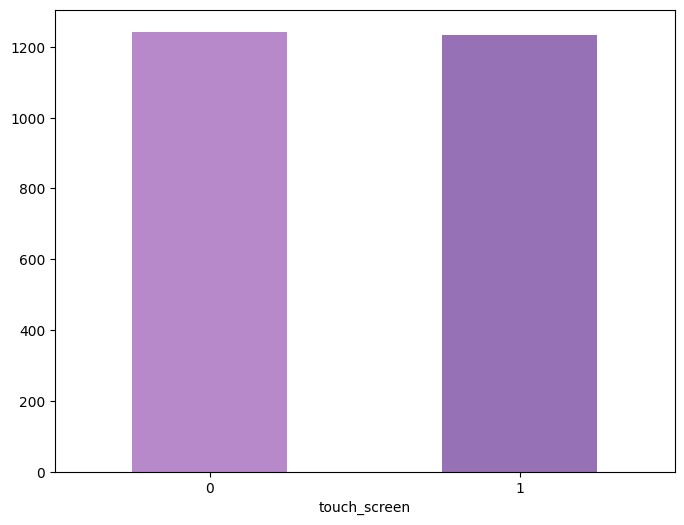

In [29]:
plt.figure(figsize=(8,6))
data.groupby(['touch_screen'])['battery_power'].mean().plot(kind = 'bar', color = cs1, rot = 0)
plt.show()

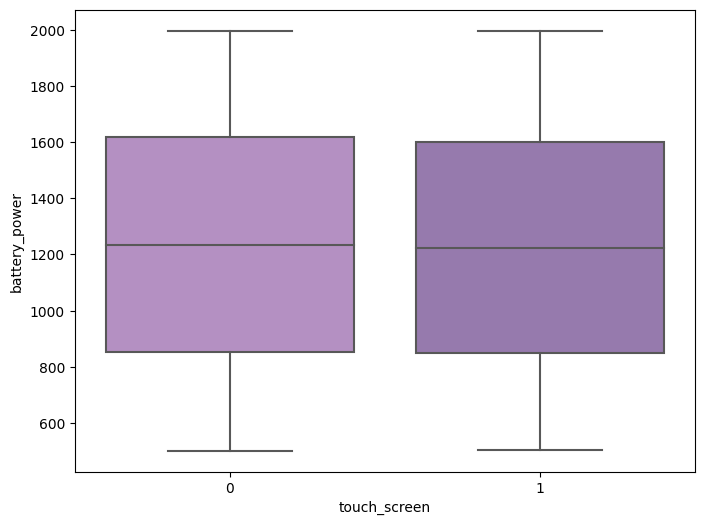

In [30]:
plt.figure(figsize=(8,6))
snsplot2 = sns.boxplot(x="touch_screen", y="battery_power", data=data, palette=cs1)
plt.show()

## Data Cleaning

In [31]:
# Cek jumlah data missing tiap kolom
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [32]:
# Cek jumlah data terduplikasi pada dataset
data.duplicated().sum()

0

In [33]:
# Drop (menghilangkan) data missing dan duplikat dari dataset
data = data.dropna().reset_index(drop=True)
data = data.drop_duplicates()
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


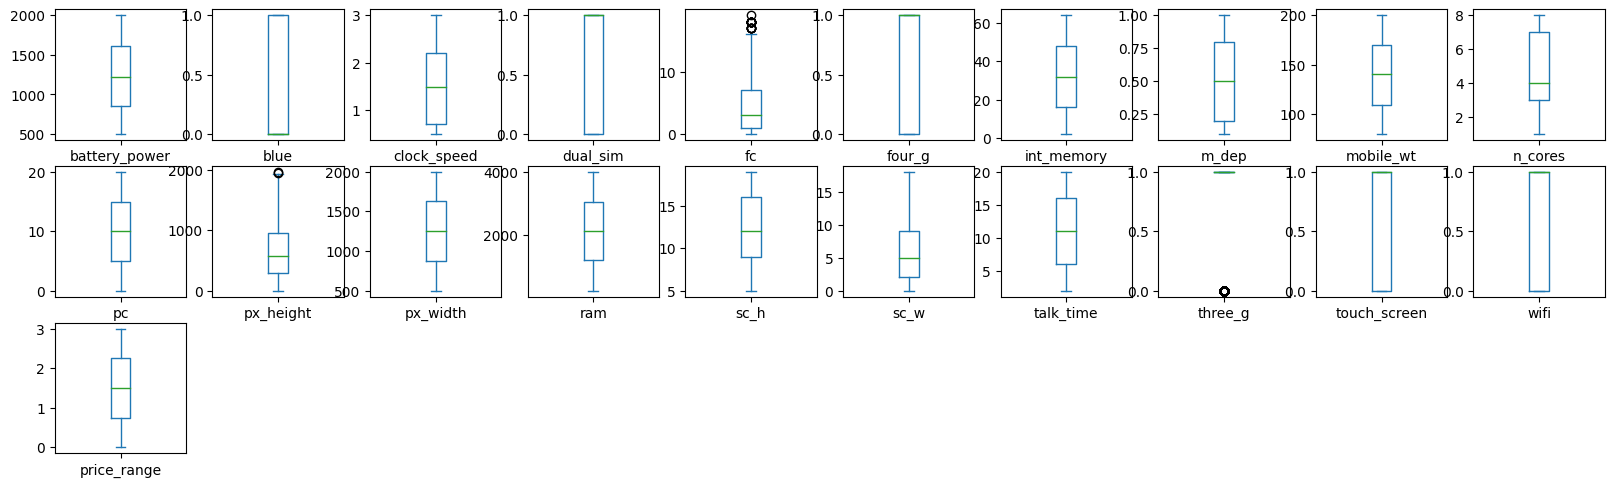

In [34]:
# Cek outlier dari dataset
data.plot(kind="box",subplots=True,layout=(10,10),sharex=False,sharey=False,figsize=(20,20))
plt.show()

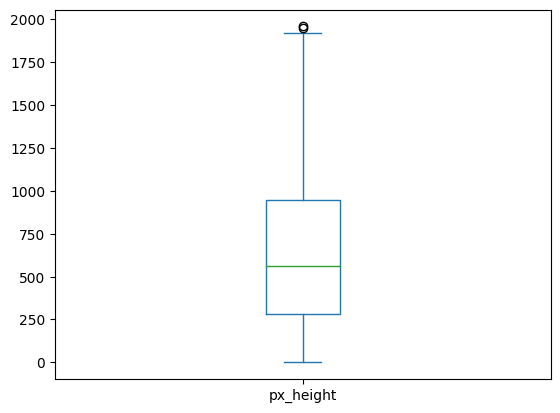

In [35]:
# Cek outlier dari data 'px_height'
data.px_height.plot(kind="box")
plt.show()

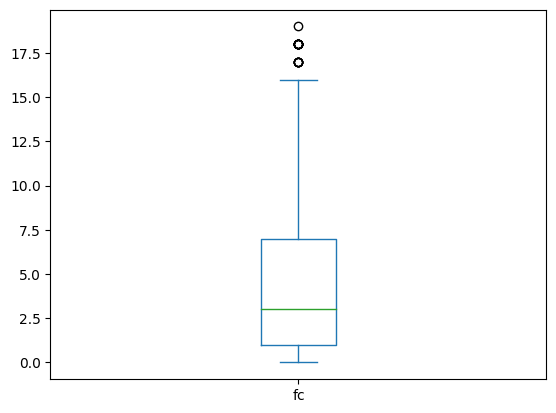

In [36]:
# Cek outlier dari data 'fc'
data.fc.plot(kind="box")
plt.show()

In [37]:
# Plot buat di PPT

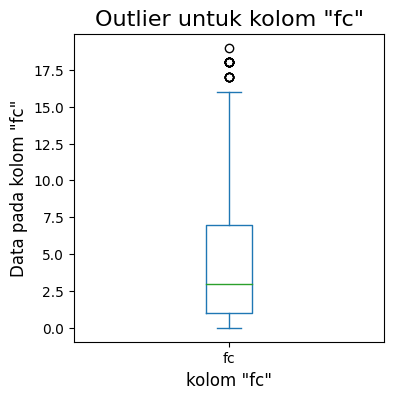

In [38]:
plt.figure(figsize=(4,4))

data.fc.plot(kind="box")
plt.title('Outlier untuk kolom "fc"', fontsize=16)
plt.xlabel('kolom "fc"', fontsize=12)
plt.ylabel('Data pada kolom "fc"', fontsize=12)

plt.show()

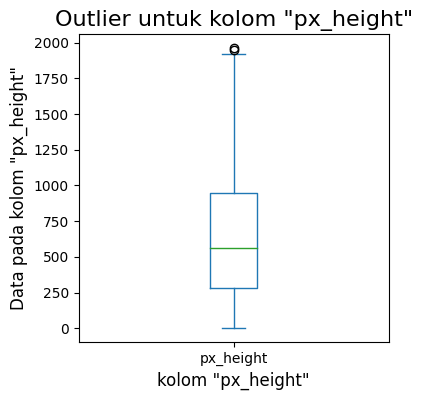

In [39]:
plt.figure(figsize=(4,4))

data.px_height.plot(kind="box")
plt.title('Outlier untuk kolom "px_height"', fontsize=16)
plt.xlabel('kolom "px_height"', fontsize=12)
plt.ylabel('Data pada kolom "px_height"', fontsize=12)

plt.show()

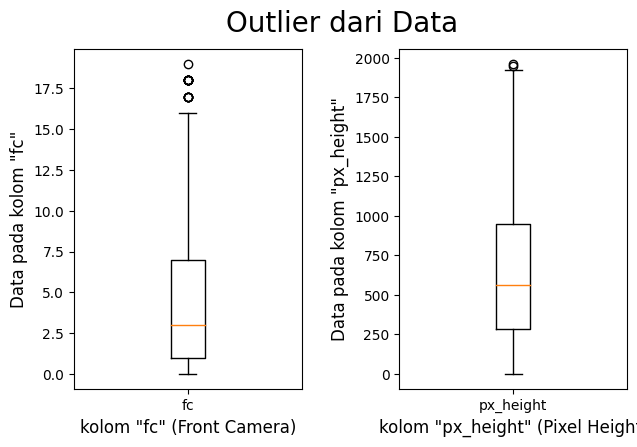

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(4)
fig.tight_layout()
#fig.suptitle('Horizontally stacked subplots')

ax1.boxplot(data['fc'])
ax1.set_xlabel('kolom "fc" (Front Camera)', fontsize=12)
ax1.set_ylabel('Data pada kolom "fc"', fontsize=12)
ax1.set_xticklabels(['fc'])

ax2.boxplot(data['px_height'])
ax2.set_xlabel('kolom "px_height" (Pixel Height)', fontsize=12)
ax2.set_ylabel('Data pada kolom "px_height"', fontsize=12)
ax2.set_xticklabels(['px_height'])

plt.subplots_adjust(right=1.5)

plt.title('Outlier dari Data', x=-0.25, y=1.025, fontsize=20)
plt.show()

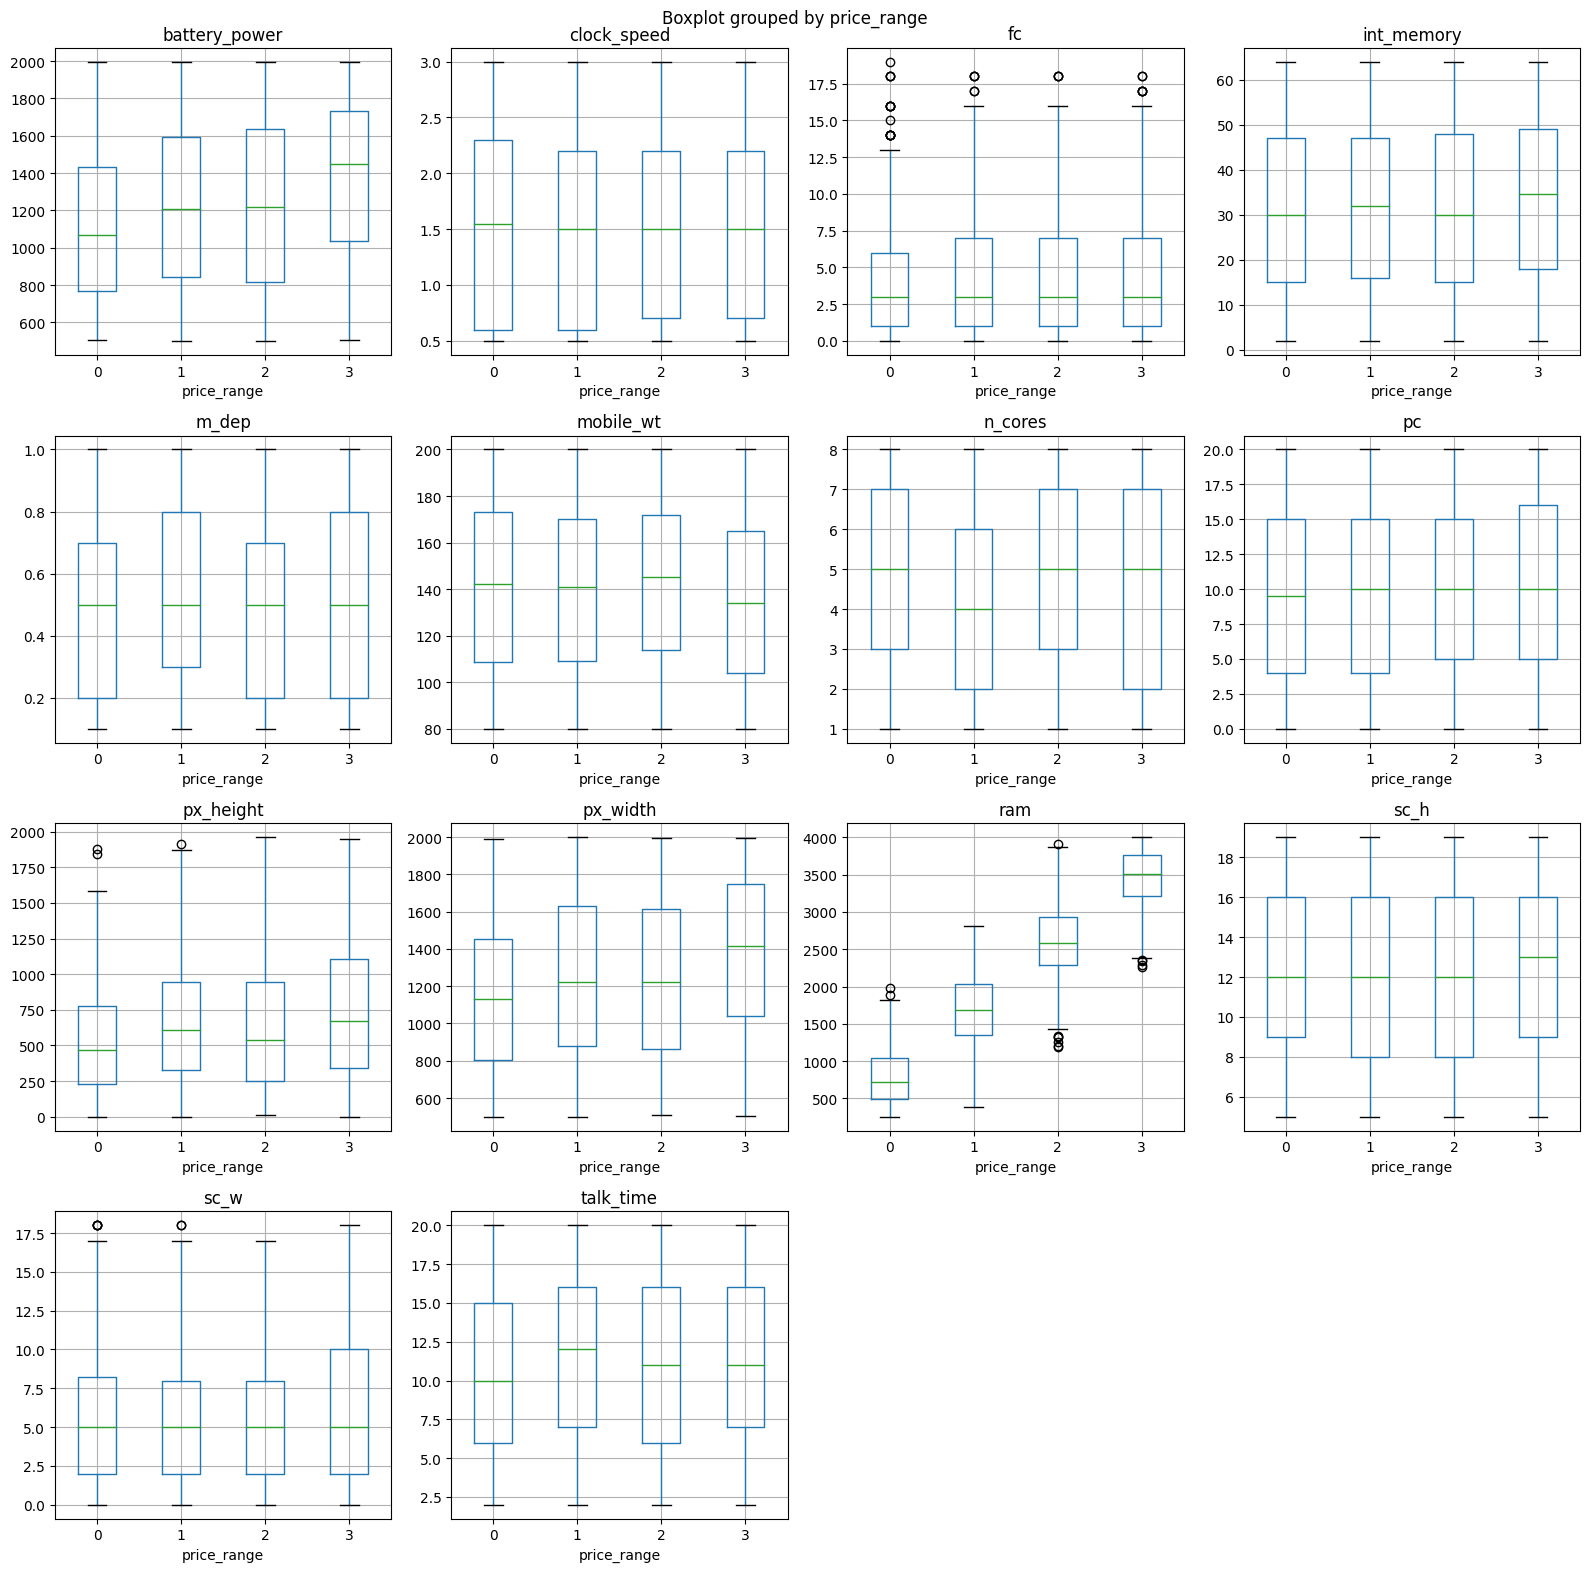

In [41]:
def showing_boxplot(data, features):
    num_plots = len(features)
    num_cols = 4  # Jumlah kolom yang ingin ditampilkan secara horizontal

    # Hitung jumlah baris yang diperlukan berdasarkan jumlah grafik dan kolom yang ingin ditampilkan
    num_rows = (num_plots + num_cols - 1) // num_cols

    # Buat subplot dengan jumlah baris dan kolom yang sesuai
    fig, axes = plt.subplots(num_rows, num_cols, squeeze=False, figsize=(16, 4*num_rows))

    for i, c in enumerate(features):
        # Hitung indeks baris dan kolom
        row = i // num_cols
        col = i % num_cols

        # 1st quartile
        Q1 = np.percentile(data[c], 25)
        # 3rd quartile
        Q3 = np.percentile(data[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index

        # Group data by "price_range" and plot boxplot
        data.boxplot(column=c, by="price_range", ax=axes[row, col])
        axes[row, col].set_title(c)  # Menambahkan judul grafik

    # Menghilangkan subplot yang tidak digunakan
    for i in range(num_plots, num_rows*num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

showing_boxplot(data, ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt",
                      "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"])

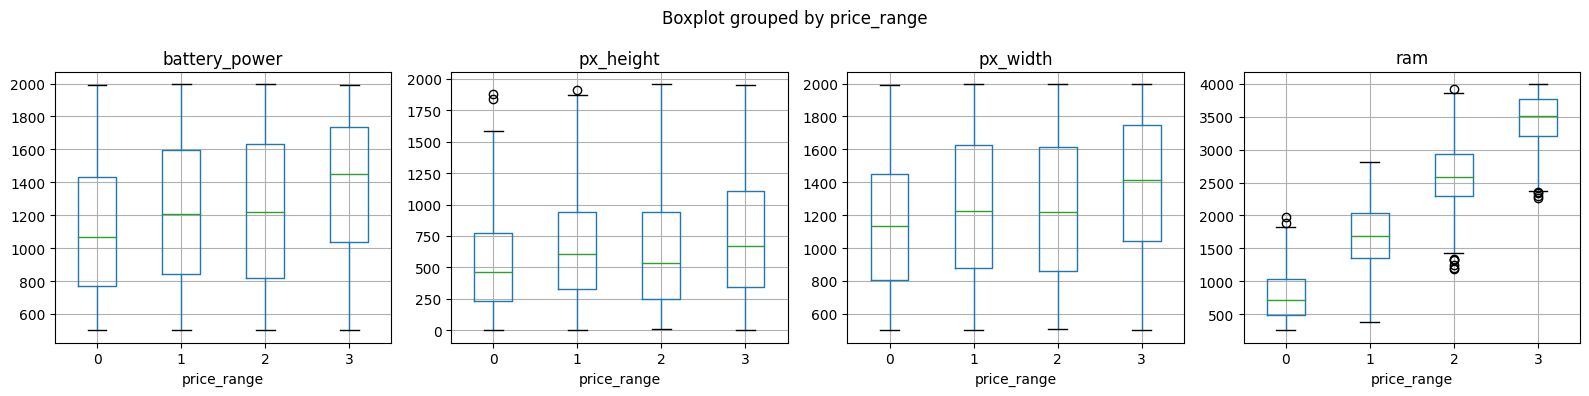

In [42]:
showing_boxplot(data, ["battery_power","px_height","px_width","ram"])

In [43]:
q1 = data["ram"].quantile(0.25)
q3 = data["ram"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

data.loc[(data["ram"] < fence_low) | (data["ram"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


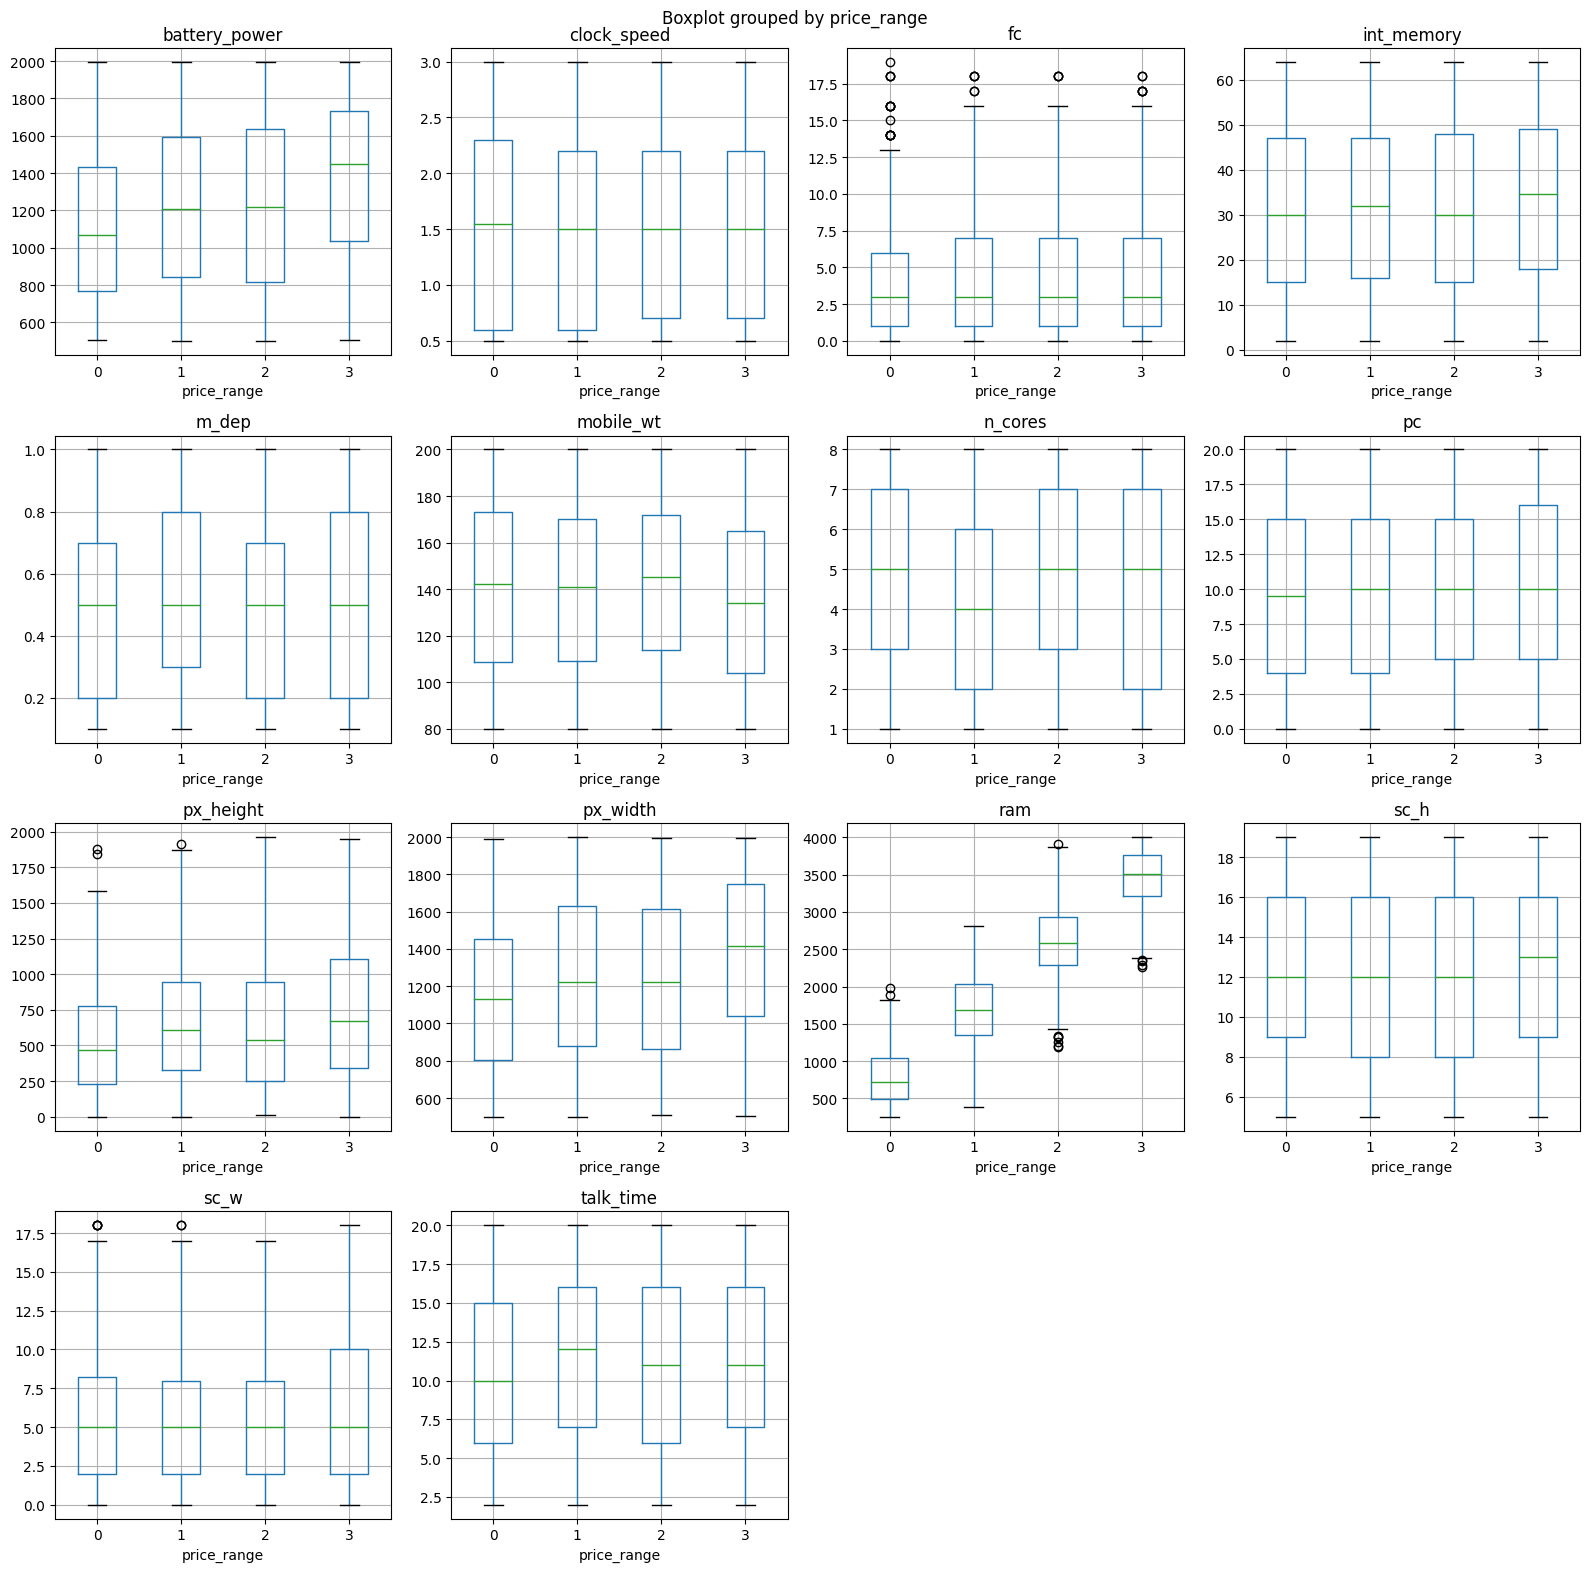

In [44]:
showing_boxplot(data,["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w","talk_time"])

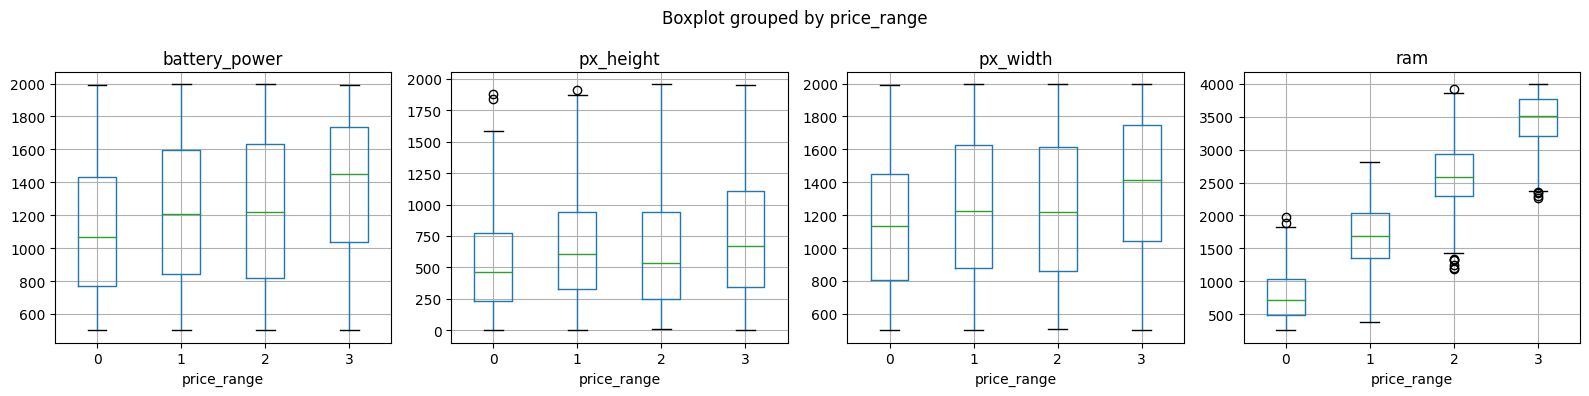

In [45]:
showing_boxplot(data,["battery_power","px_height","px_width","ram"])

In [46]:
# Cek outlier dari data 'ram' menggunakan Z-Score
data[(np.abs(stats.zscore(data["ram"])) >= 3)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [47]:
# Cek outlier dari data 'px_height' menggunakan Z-Score
data[(np.abs(stats.zscore(data["px_height"])) >= 3)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [48]:
# Cek outlier dari data 'sc_w' menggunakan Z-Score
data[(np.abs(stats.zscore(data["sc_w"])) >= 3)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


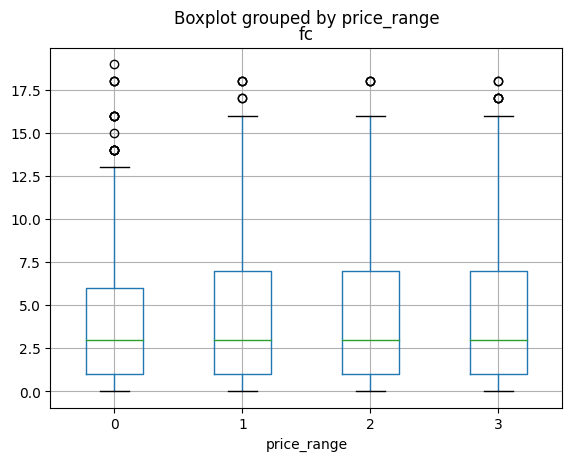

In [49]:
data[(np.abs(stats.zscore(data['fc'])) >= 3)]
data.boxplot(column='fc',by="price_range")
plt.show()

In [50]:
# Cek outlier dari data 'fc' menggunakan Z-Score
data[(np.abs(stats.zscore(data["fc"])) >= 3)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1
1416,1448,0,0.5,1,18,0,2,0.2,100,5,...,846,1144,593,9,4,18,1,1,1,0
1554,1957,0,1.2,1,18,1,36,0.8,151,2,...,1194,1727,1115,16,2,18,1,0,1,1
1693,695,0,0.5,0,18,1,12,0.6,196,2,...,1649,1829,2855,16,13,7,1,1,1,2
1705,1290,1,1.4,1,19,1,35,0.3,110,4,...,405,742,879,16,2,8,1,0,0,0
1880,1720,0,1.6,0,18,1,2,0.8,188,5,...,334,896,2522,10,5,2,1,0,1,2


In [51]:
# Menghilangkan data outlier dari 'fc'
data.drop(data[(np.abs(stats.zscore(data["fc"])) >= 3)].index, inplace=True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Corelation

<Axes: >

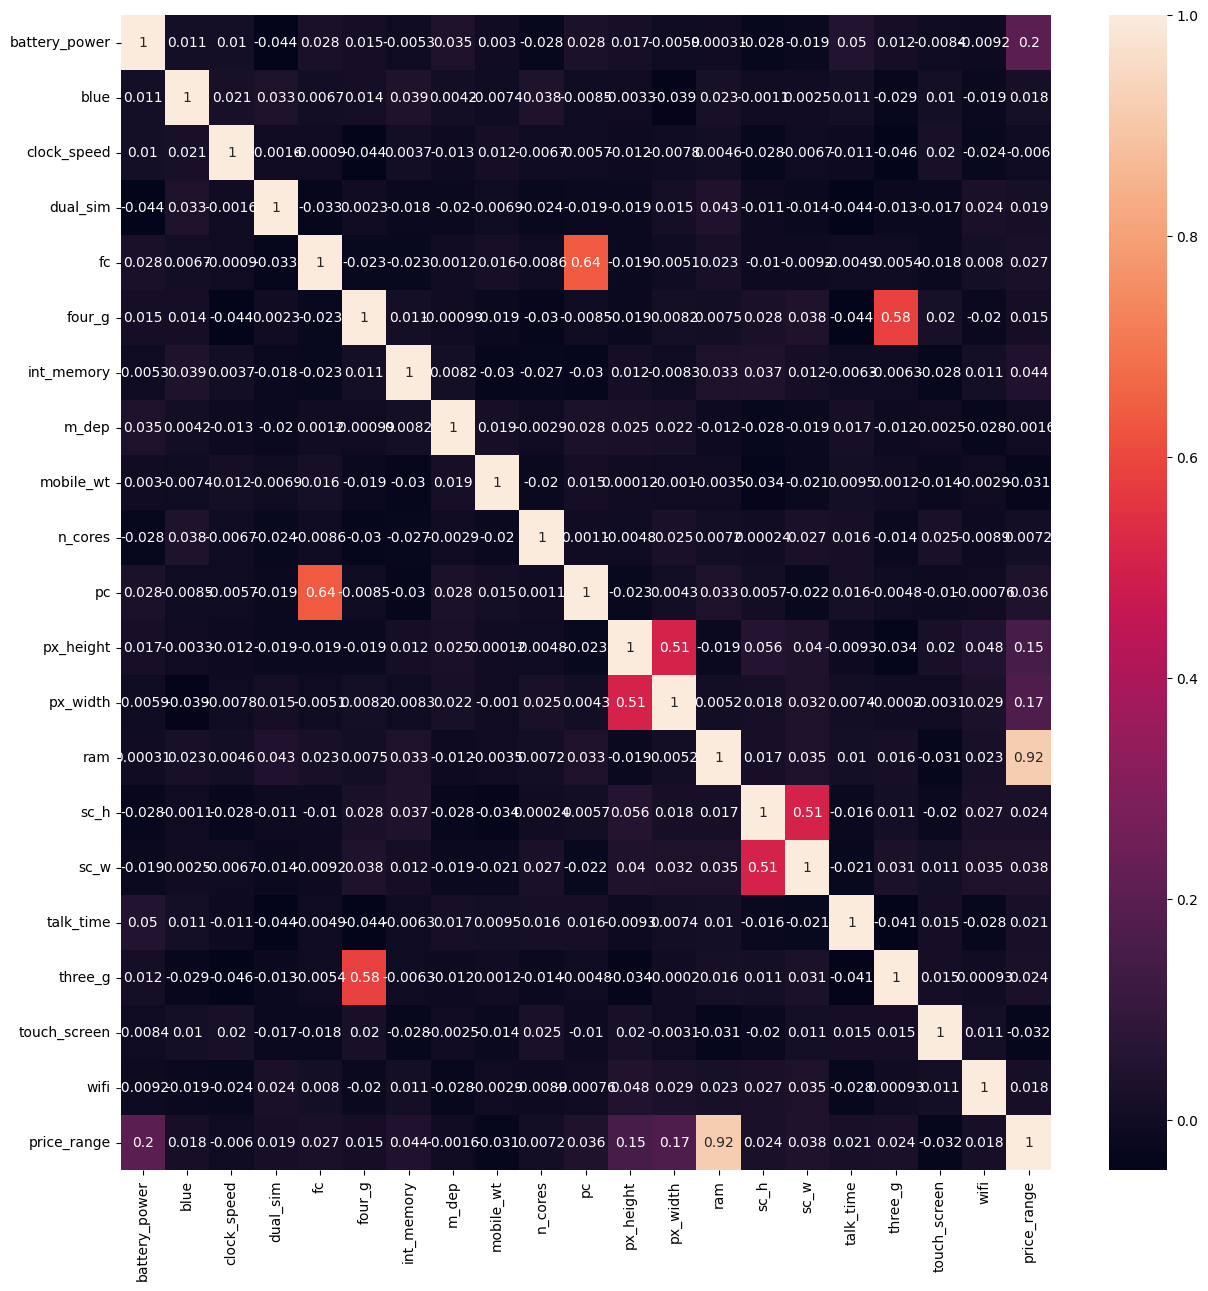

In [52]:
# Plot korelasi dari dataset menggunakan heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True)

In [53]:
# Ambil feature dengan batas korelasi
cor_target = abs(data.corr()['price_range'])

features = cor_target[cor_target>0.08]
features

battery_power    0.201768
px_height        0.150439
px_width         0.167571
ram              0.916742
price_range      1.000000
Name: price_range, dtype: float64

In [54]:
data_feature = data[['battery_power','px_height','px_width',
               'ram']]
data_target = data[['price_range']]

In [55]:
data_feature

,battery_power,px_height,px_width,ram
0,842,20,756,2549
1,1021,905,1988,2631
2,563,1263,1716,2603
3,615,1216,1786,2769
4,1821,1208,1212,1411
...,...,...,...,...
1995,794,1222,1890,668
1996,1965,915,1965,2032
1997,1911,868,1632,3057
1998,1512,336,670,869


In [56]:
data_target

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


## Modelling

### Algoritma : Random Forest, Decision Tree, Logistic Regression, SVM, KNN

### Model tanpa fitur terpilih (Training 60%, Test 40%)

In [57]:
# Split train-test tanpa fitur terpilih
X = data.loc[:, data.columns != 'price_range']
y = data["price_range"]

In [58]:
# Split train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [59]:
# Random Forest
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [60]:
# Decision Tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# Support Vector Machine (SVM)
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [63]:
# K-Nearest Neighbour (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# Predict
y_rf = classifier_rf.predict(X_test)
y_dtree = dtree.predict(X_test)
y_lr = lr.predict(X_test)
y_svm = svc.predict(X_test)
y_knn = knn.predict(X_test)

In [65]:
## Accuracy Score
print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_svm))
print(accuracy_score(y_test, y_knn))

0.8077889447236181
0.8115577889447236
0.657035175879397
0.9346733668341709
0.914572864321608


In [66]:
# Confusion Matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))
print(confusion_matrix(y_test, y_svm))
print(confusion_matrix(y_test, y_knn))

[[150  30   1   0]
 [ 39 116  32  10]
 [  1  51 106  70]
 [  0   3  36 151]]
[[161  20   0   0]
 [ 29 158  10   0]
 [  0  35 157  36]
 [  0   0  20 170]]
[[175   6   0   0]
 [ 31 153  13   0]
 [  0  57 130  41]
 [  0   0   5 185]]
[[178   3   0   0]
 [ 10 186   1   0]
 [  0  21 192  15]
 [  0   0   2 188]]
[[177   4   0   0]
 [  9 183   5   0]
 [  0  20 194  14]
 [  0   0  16 174]]


In [67]:
print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_svm))
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       181
           1       0.71      0.78      0.74       197
           2       0.88      0.57      0.69       228
           3       0.82      0.97      0.89       190

    accuracy                           0.81       796
   macro avg       0.81      0.82      0.81       796
weighted avg       0.82      0.81      0.80       796

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       181
           1       0.74      0.80      0.77       197
           2       0.84      0.69      0.76       228
           3       0.83      0.89      0.86       190

    accuracy                           0.81       796
   macro avg       0.81      0.82      0.81       796
weighted avg       0.81      0.81      0.81       796

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       181
           1       0.

### Model dengan fitur terpilih (Training 60%, Test 40%)

In [68]:
# x y berdasarkan korelasi
X = data_feature
y = data_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [69]:
classifier_rf.fit(X_train, y_train)
dtree.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

<ipython-input-69-fe5f2ccce897>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

KNeighborsClassifier()

In [70]:
# Predict
y_rf = classifier_rf.predict(X_test)
y_dtree = dtree.predict(X_test)
y_lr = lr.predict(X_test)
y_svm = svc.predict(X_test)
y_knn = knn.predict(X_test)

In [71]:
## Accuracy Score
print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_svm))
print(accuracy_score(y_test, y_knn))

0.8756281407035176
0.8391959798994975
0.9447236180904522
0.9309045226130653
0.914572864321608


In [72]:
# Confusion Matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))
print(confusion_matrix(y_test, y_svm))
print(confusion_matrix(y_test, y_knn))

[[177   4   0   0]
 [  5 188   4   0]
 [  0  12 202  14]
 [  0   0   5 185]]
[[164  17   0   0]
 [ 26 164   7   0]
 [  0  33 167  28]
 [  0   0  17 173]]
[[174   7   0   0]
 [ 17 172   8   0]
 [  0  31 177  20]
 [  0   0  16 174]]
[[178   3   0   0]
 [ 12 183   2   0]
 [  0  20 195  13]
 [  0   0   5 185]]
[[177   4   0   0]
 [  9 183   5   0]
 [  0  19 195  14]
 [  0   0  17 173]]


In [73]:
print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_svm))
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       181
           1       0.82      0.87      0.85       197
           2       0.88      0.78      0.83       228
           3       0.90      0.92      0.91       190

    accuracy                           0.88       796
   macro avg       0.88      0.88      0.88       796
weighted avg       0.88      0.88      0.87       796

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       181
           1       0.77      0.83      0.80       197
           2       0.87      0.73      0.80       228
           3       0.86      0.91      0.88       190

    accuracy                           0.84       796
   macro avg       0.84      0.85      0.84       796
weighted avg       0.84      0.84      0.84       796

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       181
           1       0.

### Model dengan fitur terpilih (Training 70%, Test 30%)

In [74]:
X = data_feature
y = data_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [75]:
classifier_rf.fit(X_train, y_train)
dtree.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

<ipython-input-75-fe5f2ccce897>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

KNeighborsClassifier()

In [76]:
# Predict
y_rf = classifier_rf.predict(X_test)
y_dtree = dtree.predict(X_test)
y_lr = lr.predict(X_test)
y_svm = svc.predict(X_test)
y_knn = knn.predict(X_test)

print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_svm))
print(accuracy_score(y_test, y_knn))

0.8793969849246231
0.8291457286432161
0.9514237855946399
0.9363484087102177
0.9128978224455612


In [77]:
# Confusion Matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))
print(confusion_matrix(y_test, y_svm))
print(confusion_matrix(y_test, y_knn))

[[133   2   0   0]
 [  3 144   4   0]
 [  0   7 151   7]
 [  0   0   6 140]]
[[128   7   0   0]
 [ 15 114  22   0]
 [  0  19 124  22]
 [  0   0  17 129]]
[[130   5   0   0]
 [ 11 130  10   0]
 [  0  19 133  13]
 [  0   0  14 132]]
[[133   2   0   0]
 [  5 143   3   0]
 [  0  12 144   9]
 [  0   0   7 139]]
[[132   3   0   0]
 [  7 139   5   0]
 [  0  10 145  10]
 [  0   0  17 129]]


In [78]:
# Classification Report
print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_svm))
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       135
           1       0.84      0.86      0.85       151
           2       0.85      0.81      0.83       165
           3       0.91      0.90      0.91       146

    accuracy                           0.88       597
   macro avg       0.88      0.88      0.88       597
weighted avg       0.88      0.88      0.88       597

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       135
           1       0.81      0.75      0.78       151
           2       0.76      0.75      0.76       165
           3       0.85      0.88      0.87       146

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       135
           1       0.

### Model dengan fitur terpilih (Training 80%, Test 20%)

In [79]:
X = data_feature
y = data_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [80]:
classifier_rf.fit(X_train, y_train)
dtree.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

<ipython-input-80-fe5f2ccce897>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

KNeighborsClassifier()

In [81]:
# Predict
y_rf = classifier_rf.predict(X_test)
y_dtree = dtree.predict(X_test)
y_lr = lr.predict(X_test)
y_svm = svc.predict(X_test)
y_knn = knn.predict(X_test)

print(accuracy_score(y_test, y_rf))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_svm))
print(accuracy_score(y_test, y_knn))

0.8793969849246231
0.8316582914572864
0.9472361809045227
0.9422110552763819
0.9045226130653267


In [82]:
# Confusion Matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))
print(confusion_matrix(y_test, y_svm))
print(confusion_matrix(y_test, y_knn))

[[98  1  0  0]
 [ 2 87  4  0]
 [ 0  4 97  5]
 [ 0  0  5 95]]
[[88 11  0  0]
 [ 6 79  8  0]
 [ 0 14 76 16]
 [ 0  0 12 88]]
[[93  6  0  0]
 [ 3 83  7  0]
 [ 0 14 83  9]
 [ 0  0  9 91]]
[[98  1  0  0]
 [ 2 88  3  0]
 [ 0  7 95  4]
 [ 0  0  6 94]]
[[95  4  0  0]
 [ 1 88  4  0]
 [ 0  9 92  5]
 [ 0  0 15 85]]


In [83]:
# Classification Report
print(classification_report(y_test, y_rf))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_svm))
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        99
           1       0.81      0.89      0.85        93
           2       0.84      0.78      0.81       106
           3       0.91      0.91      0.91       100

    accuracy                           0.88       398
   macro avg       0.88      0.88      0.88       398
weighted avg       0.88      0.88      0.88       398

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        99
           1       0.76      0.85      0.80        93
           2       0.79      0.72      0.75       106
           3       0.85      0.88      0.86       100

    accuracy                           0.83       398
   macro avg       0.83      0.83      0.83       398
weighted avg       0.83      0.83      0.83       398

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.

## Best Feature Number for Each Machine Learning Algorithm

In [84]:
X = data.loc[:, data.columns != 'price_range']
y = data["price_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

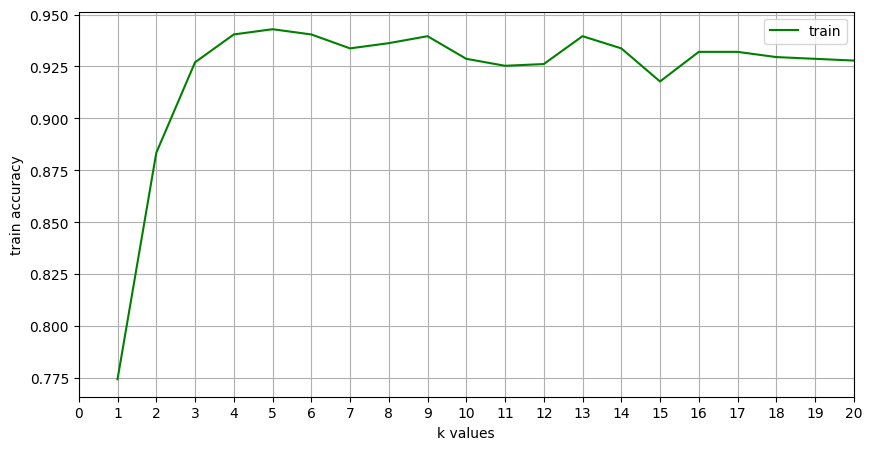

In [85]:
# Cek feature untuk Random Forest
accuracy_list_train = []
k = np.arange(1, 21, 1)
for each in k:
    X_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    classifier_rf.fit(X_new, y_train)
    accuracy_list_train.append(classifier_rf.score(X_new, y_train))

tick = np.arange(0, 21, 1)
plt.figure(figsize=(10, 5))
plt.plot(k, accuracy_list_train, color="green", label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.xlim(0, 20)
plt.xticks(tick)
plt.legend()
plt.grid()
plt.show()

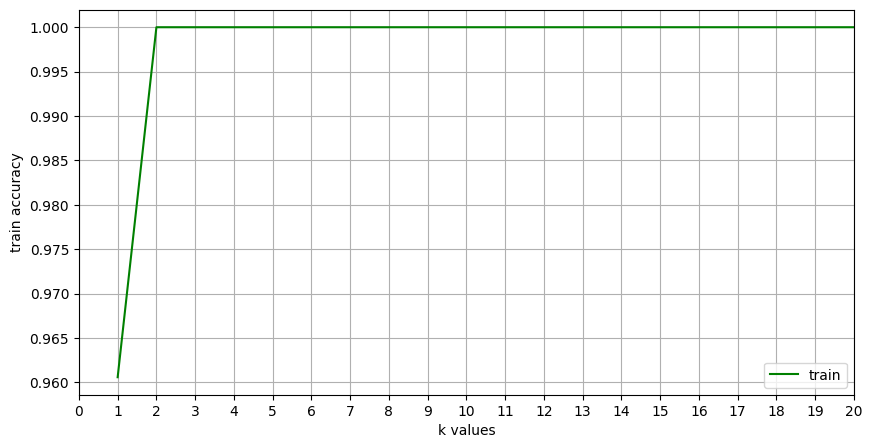

In [86]:
# Cek feature untuk Decision Tree
accuracy_list_train = []
k = np.arange(1, 21, 1)
for each in k:
    X_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    dtree.fit(X_new, y_train)
    accuracy_list_train.append(dtree.score(X_new, y_train))

tick = np.arange(0, 21, 1)
plt.figure(figsize=(10, 5))
plt.plot(k, accuracy_list_train, color="green", label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.xlim(0, 20)
plt.xticks(tick)
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

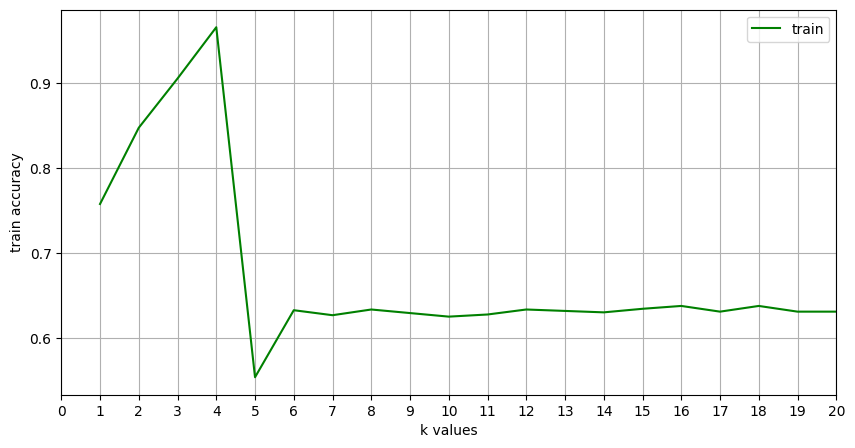

In [87]:
# Cek feature untuk Logistic Regression
accuracy_list_train = []
k = np.arange(1, 21, 1)
for each in k:
    X_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    lr.fit(X_new, y_train)
    accuracy_list_train.append(lr.score(X_new, y_train))

tick = np.arange(0, 21, 1)
plt.figure(figsize=(10, 5))
plt.plot(k, accuracy_list_train, color="green", label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.xlim(0, 20)
plt.xticks(tick)
plt.legend()
plt.grid()
plt.show()

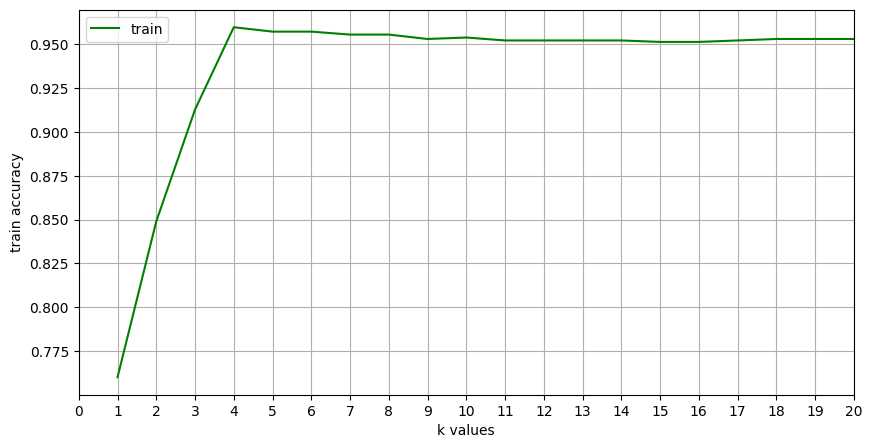

In [88]:
# Cek feature untuk SVM
accuracy_list_train = []
k = np.arange(1, 21, 1)
for each in k:
    X_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    svc.fit(X_new, y_train)
    accuracy_list_train.append(svc.score(X_new, y_train))

tick = np.arange(0, 21, 1)
plt.figure(figsize=(10, 5))
plt.plot(k, accuracy_list_train, color="green", label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.xlim(0, 20)
plt.xticks(tick)
plt.legend()
plt.grid()
plt.show()

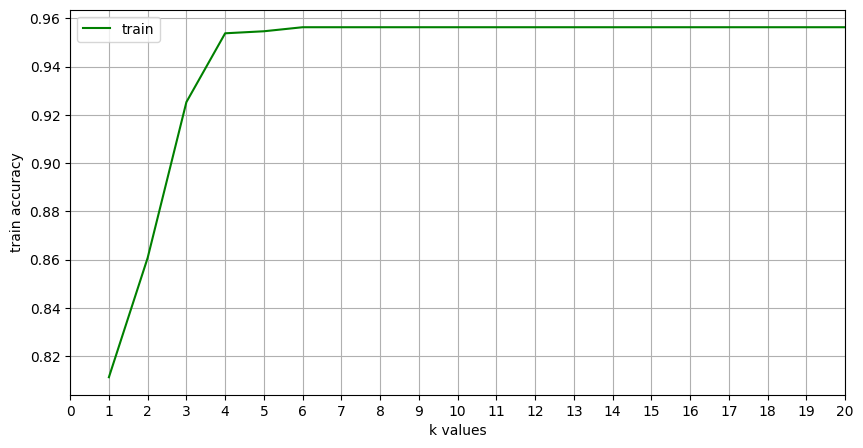

In [89]:
# Cek feature untuk KNN
accuracy_list_train = []
k = np.arange(1, 21, 1)
for each in k:
    X_new = SelectKBest(f_classif, k=each).fit_transform(X_train, y_train)
    knn.fit(X_new, y_train)
    accuracy_list_train.append(knn.score(X_new, y_train))

tick = np.arange(0, 21, 1)
plt.figure(figsize=(10, 5))
plt.plot(k, accuracy_list_train, color="green", label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.xlim(0, 20)
plt.xticks(tick)
plt.legend()
plt.grid()
plt.show()
